# Analyse the GAIA DR2 catalog simulated with PhoSim

We queried GAIA DR2 catalog for regions centered on different galactic latitudes, with size 0.4x0.4 degrees. The latitudes are representative of different stellar densities. We plot below the location of each field (as well as Small/Large Magellanic Clouds) on top of the GALFAST simulated LSST night sky stellar density map: <img src='MAF_DECAPS.png'></img> Input catalogs have:
- high latitude ($l=85^\circ$,$b=0^\circ$): 1,759 stars
- medium latitude ($l=40^\circ$,$b=0^\circ$): 5,805 stars
- low latitude ($l=10^\circ$,$b=0^\circ$): 222,070 stars
- Baade's window ($l=-3.92^\circ$, $b=1.02^\circ$): 540,262 stars


Note: we are using `lsst-aos` kernel, which uses `2020_24` stack , the same as the one used to ingest raw / postISR images in the analysis below. 

## Plot the post-ISR in-focus and defocal image for each galactic latitude simulated

In [32]:
import os
from astropy.table import Table
import numpy as np

# IMPORT CUSTOM FUNCTIONS 
import sys
sys.path.append('../analysis_tools/')
from calcMetrics import calcMetrics
import analysisTools as at 
import imp
imp.reload(at)

# IMPORT PLOTTING MODULES
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

In [28]:
baseDir = '/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/'
topDir = 'results_gaia'

## High galactic latitude

In [33]:
#read in the images
field='high'
raft='R22'
detector='S00'
  
resDir = 'dr2_%s_full_2020_24_wide'%field
data_dir = os.path.join(baseDir, topDir,resDir)
sensor  = '%s_%s'%(raft,detector)

images = {}
focalTypes = ['focal','extra']
for focalType in focalTypes :
    images[focalType] = at.readPostISRImage(data_dir, 
                            focalType =focalType, 
                            raft = raft, detector = detector,rerun='run2')


data_id is
{'visit': 9006000, 'filter': 'g', 'raftName': 'R22', 'detectorName': 'S00', 'detector': 90}
Reading postISR images from the following repo_dir:
/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/dr2_high_full_2020_24_wide/input/rerun/run2
Done

data_id is
{'visit': 9006001, 'filter': 'g', 'raftName': 'R22', 'detectorName': 'S00', 'detector': 90}
Reading postISR images from the following repo_dir:
/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/dr2_high_full_2020_24_wide/input/rerun/run2
Done



Saved as in-out_dr2_high_full_2020_24_wide_R22_S00.png


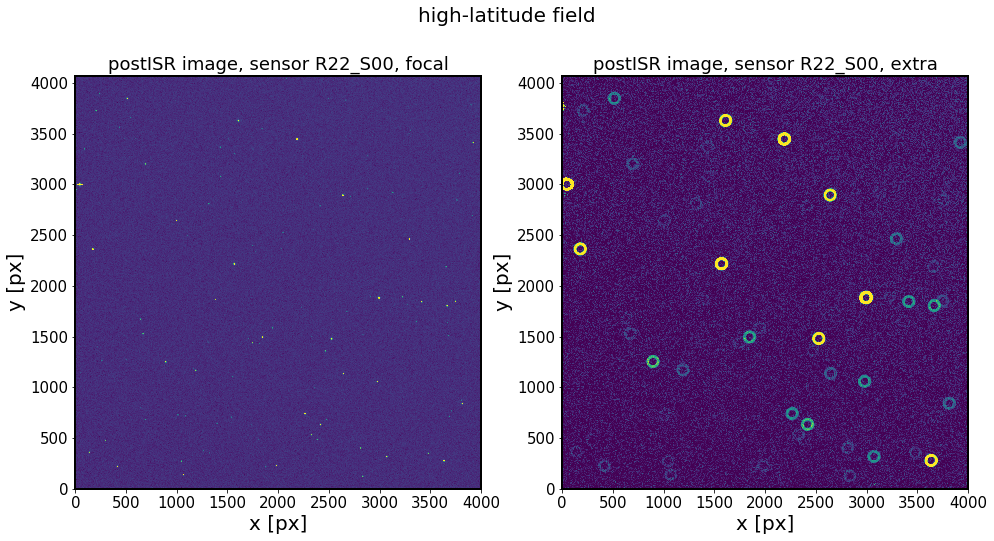

In [34]:
%matplotlib inline
# plot the images 
fig, ax = plt.subplots(1,2,figsize=(16,8))

focalArgs={'vmin':2.3, 'vmax':3.5} 
extraArgs={'vmin':2.45, 'vmax':2.75}

ax[0].imshow(np.log10(images['focal'].T), 
             origin='lower',**focalArgs)

ax[1].imshow(np.log10(images['extra'].T),
             origin='lower', **extraArgs)

i = 0 
focalTypes = ['focal', 'extra']
for focalType in focalTypes :
    ax[i].set_xlabel('x [px]')
    ax[i].set_ylabel('y [px]')
    ax[i].set_title('postISR image, sensor %s, %s'%(sensor,focalType))
    i += 1

plt.subplots_adjust(hspace=0)
fig.suptitle(field+ '-latitude field', fontsize=20)
fname = 'in-out_%s_%s.png'%(resDir,sensor)
print('Saved as %s'%fname)
plt.savefig(fname, bbox_inches='tight', dpi=100)

### Medium#

In [35]:
#read in the images
field='med'
raft='R22'
detector='S00'
  
resDir = 'dr2_%s_full_2020_24_wide'%field
data_dir = os.path.join(baseDir, topDir,resDir)
sensor  = '%s_%s'%(raft,detector)

images = {}
focalTypes = ['focal','extra']
for focalType in focalTypes :
    images[focalType] = at.readPostISRImage(data_dir, 
                            focalType =focalType, 
                            raft = raft, detector = detector,rerun='run2')


data_id is
{'visit': 9006000, 'filter': 'g', 'raftName': 'R22', 'detectorName': 'S00', 'detector': 90}
Reading postISR images from the following repo_dir:
/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/dr2_med_full_2020_24_wide/input/rerun/run2
Done

data_id is
{'visit': 9006001, 'filter': 'g', 'raftName': 'R22', 'detectorName': 'S00', 'detector': 90}
Reading postISR images from the following repo_dir:
/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/dr2_med_full_2020_24_wide/input/rerun/run2
Done



/astro/store/epyc/projects/lsst_comm/stack_w_2020_24/conda/miniconda3-4.7.12/envs/lsst-scipipe-1a1d771/lib/python3.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in log10
/astro/store/epyc/projects/lsst_comm/stack_w_2020_24/conda/miniconda3-4.7.12/envs/lsst-scipipe-1a1d771/lib/python3.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in log10


Saved as in-out_dr2_med_full_2020_24_wide_R22_S00.png


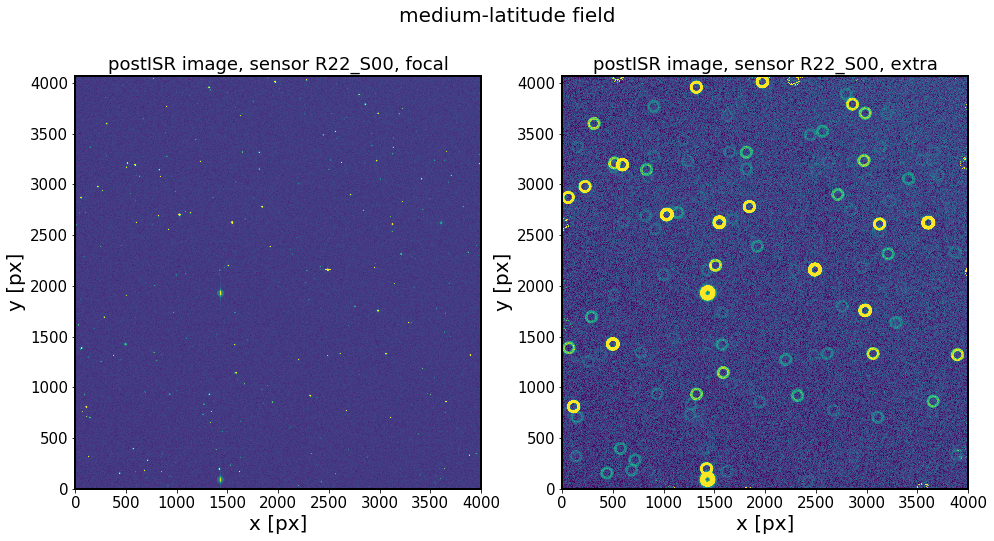

In [36]:
# plot the images 
fig, ax = plt.subplots(1,2,figsize=(16,8))

focalArgs={'vmin':2.3, 'vmax':3.5} 
extraArgs={'vmin':2.45, 'vmax':2.75}

ax[0].imshow(np.log10(images['focal'].T), 
             origin='lower',**focalArgs)

ax[1].imshow(np.log10(images['extra'].T),
             origin='lower', **extraArgs)

i = 0 
focalTypes = ['focal', 'extra']
for focalType in focalTypes :
    ax[i].set_xlabel('x [px]')
    ax[i].set_ylabel('y [px]')
    ax[i].set_title('postISR image, sensor %s, %s'%(sensor,focalType))
    i += 1

plt.subplots_adjust(hspace=0)
fig.suptitle('medium-latitude field', fontsize=20)
fname = 'in-out_%s_%s.png'%(resDir,sensor)
print('Saved as %s'%fname)
plt.savefig(fname, bbox_inches='tight', dpi=100)

## Low

In [37]:
#read in the images
field='low'
raft='R22'
detector='S00'
  
resDir = 'dr2_%s_full_2020_24_wide'%field
data_dir = os.path.join(baseDir, topDir,resDir)
sensor  = '%s_%s'%(raft,detector)

images = {}
focalTypes = ['focal','extra']
for focalType in focalTypes :
    images[focalType] = at.readPostISRImage(data_dir, 
                            focalType =focalType, 
                            raft = raft, detector = detector,rerun='run2')


data_id is
{'visit': 9006000, 'filter': 'g', 'raftName': 'R22', 'detectorName': 'S00', 'detector': 90}
Reading postISR images from the following repo_dir:
/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/dr2_low_full_2020_24_wide/input/rerun/run2
Done

data_id is
{'visit': 9006001, 'filter': 'g', 'raftName': 'R22', 'detectorName': 'S00', 'detector': 90}
Reading postISR images from the following repo_dir:
/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/dr2_low_full_2020_24_wide/input/rerun/run2
Done



Saved as in-out_dr2_low_full_2020_24_wide_R22_S00.png


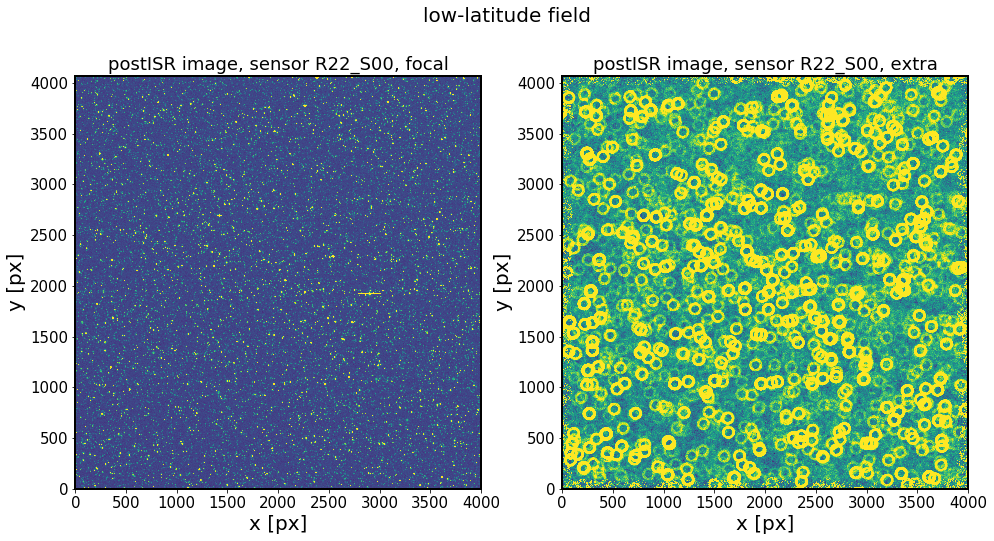

In [38]:
# plot the images 
fig, ax = plt.subplots(1,2,figsize=(16,8))

focalArgs={'vmin':2.3, 'vmax':3.5} 
extraArgs={'vmin':2.45, 'vmax':2.75}

ax[0].imshow(np.log10(images['focal'].T), 
             origin='lower',**focalArgs)

ax[1].imshow(np.log10(images['extra'].T),
             origin='lower', **extraArgs)

i = 0 
focalTypes = ['focal', 'extra']
for focalType in focalTypes :
    ax[i].set_xlabel('x [px]')
    ax[i].set_ylabel('y [px]')
    ax[i].set_title('postISR image, sensor %s, %s'%(sensor,focalType))
    i += 1

plt.subplots_adjust(hspace=0)
fig.suptitle('low-latitude field', fontsize=20)
fname = 'in-out_%s_%s.png'%(resDir,sensor)
print('Saved as %s'%fname)
plt.savefig(fname, bbox_inches='tight', dpi=100)

## Baade's window:

In [39]:
#read in the images
field='Baade'
raft='R22'
detector='S11'
  
resDir = 'dr2_%s_full_2020_24_wide'%field
data_dir = os.path.join(baseDir, topDir,resDir)
sensor  = '%s_%s'%(raft,detector)

images = {}
focalTypes = ['focal','extra']
for focalType in focalTypes :
    images[focalType] = at.readPostISRImage(data_dir, 
                            focalType =focalType, 
                            raft = raft, detector = detector,rerun='run2')


data_id is
{'visit': 9006000, 'filter': 'g', 'raftName': 'R22', 'detectorName': 'S11', 'detector': 94}
Reading postISR images from the following repo_dir:
/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/dr2_Baade_full_2020_24_wide/input/rerun/run2
Done

data_id is
{'visit': 9006001, 'filter': 'g', 'raftName': 'R22', 'detectorName': 'S11', 'detector': 94}
Reading postISR images from the following repo_dir:
/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/dr2_Baade_full_2020_24_wide/input/rerun/run2
Done



/astro/store/epyc/projects/lsst_comm/stack_w_2020_24/conda/miniconda3-4.7.12/envs/lsst-scipipe-1a1d771/lib/python3.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in log10
/astro/store/epyc/projects/lsst_comm/stack_w_2020_24/conda/miniconda3-4.7.12/envs/lsst-scipipe-1a1d771/lib/python3.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in log10


Saved as in-out_dr2_Baade_full_2020_24_wide_R22_S11.png


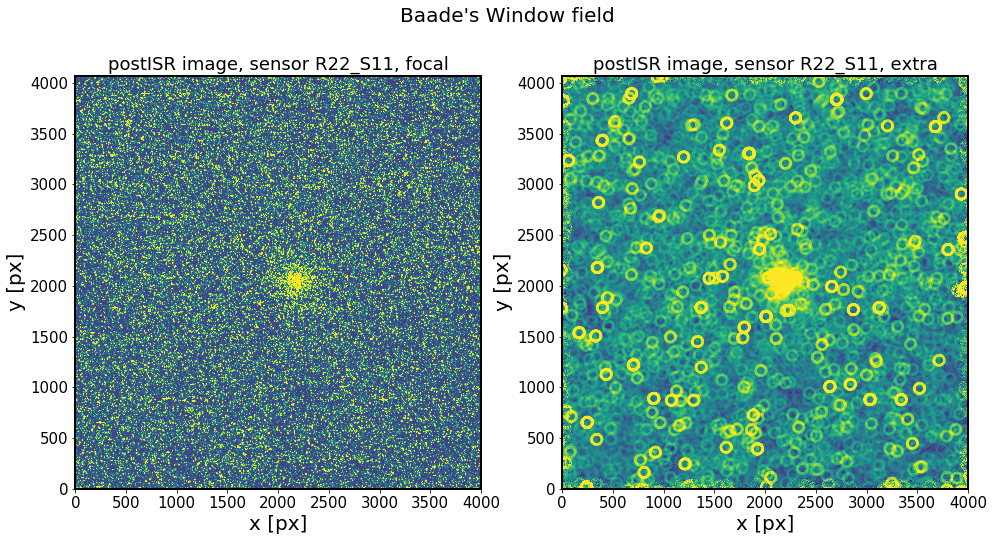

In [40]:
# plot the images 
fig, ax = plt.subplots(1,2,figsize=(16,8))

focalArgs={'vmin':2.3, 'vmax':3.5} 
extraArgs={'vmin':2.55, 'vmax':3.65}

ax[0].imshow(np.log10(images['focal'].T), 
             origin='lower',**focalArgs)

ax[1].imshow(np.log10(images['extra'].T),
             origin='lower', **extraArgs)

i = 0 
focalTypes = ['focal', 'extra']
for focalType in focalTypes :
    ax[i].set_xlabel('x [px]')
    ax[i].set_ylabel('y [px]')
    ax[i].set_title('postISR image, sensor %s, %s'%(sensor,focalType))
    i += 1

plt.subplots_adjust(hspace=0)
fig.suptitle("Baade's Window field", fontsize=20)
fname = 'in-out_%s_%s.png'%(resDir,sensor)
print('Saved as %s'%fname)
plt.savefig(fname, bbox_inches='tight', dpi=100)

## Pleiades

In [41]:
#read in the images
field='Pleiades'
raft='R22'
detector='S02'
  
resDir = 'dr2_%s_full_2020_24_wide'%field
data_dir = os.path.join(baseDir, topDir,resDir)
sensor  = '%s_%s'%(raft,detector)

images = {}
focalTypes = ['focal','extra']
for focalType in focalTypes :
    images[focalType] = at.readPostISRImage(data_dir, 
                            focalType =focalType, 
                            raft = raft, detector = detector,rerun='run2')



data_id is
{'visit': 9006000, 'filter': 'g', 'raftName': 'R22', 'detectorName': 'S02', 'detector': 92}
Reading postISR images from the following repo_dir:
/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/dr2_Pleiades_full_2020_24_wide/input/rerun/run2
Done

data_id is
{'visit': 9006001, 'filter': 'g', 'raftName': 'R22', 'detectorName': 'S02', 'detector': 92}
Reading postISR images from the following repo_dir:
/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/dr2_Pleiades_full_2020_24_wide/input/rerun/run2
Done



/astro/store/epyc/projects/lsst_comm/stack_w_2020_24/conda/miniconda3-4.7.12/envs/lsst-scipipe-1a1d771/lib/python3.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in log10
/astro/store/epyc/projects/lsst_comm/stack_w_2020_24/conda/miniconda3-4.7.12/envs/lsst-scipipe-1a1d771/lib/python3.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in log10


Saved as in-out_dr2_Pleiades_full_2020_24_wide_R22_S02.png


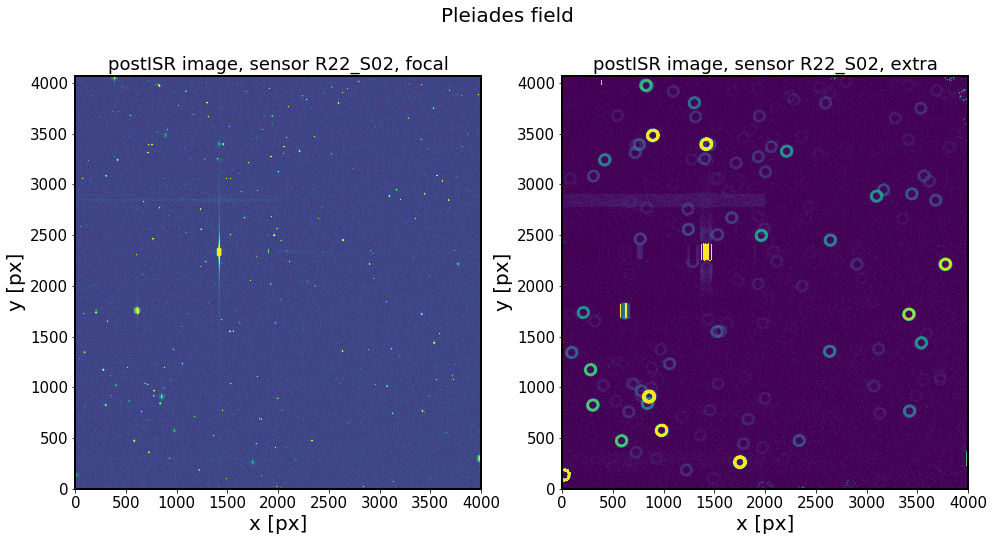

In [43]:
# plot the images 
fig, ax = plt.subplots(1,2,figsize=(16,8))

focalArgs={'vmin':2.3, 'vmax':3.5} 
extraArgs={'vmin':2.55, 'vmax':3.65}

ax[0].imshow(np.log10(images['focal'].T), 
             origin='lower',**focalArgs)

ax[1].imshow(np.log10(images['extra'].T),
             origin='lower', **extraArgs)

i = 0 
focalTypes = ['focal', 'extra']
for focalType in focalTypes :
    ax[i].set_xlabel('x [px]')
    ax[i].set_ylabel('y [px]')
    ax[i].set_title('postISR image, sensor %s, %s'%(sensor,focalType))
    i += 1

plt.subplots_adjust(hspace=0)
fig.suptitle("Pleiades field", fontsize=20)
fname = 'in-out_%s_%s.png'%(resDir,sensor)
print('Saved as %s'%fname)
plt.savefig(fname, bbox_inches='tight', dpi=100)

## Plot the entire ComCam R22 raft at few locations
    
    

In [44]:
# First, read all the image data 
baseDir = '/astro/store/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/'
topDir = 'results_gaia'
resDir = 'dr2_high_full_2020_24_wide'
data_dir = os.path.join(baseDir, topDir,resDir)

focalType = 'extra'

raft = 'R22'
images = {}
for detector in ['S00','S01','S02', 'S10', 'S11', 'S12', 'S20','S21','S22']:
    images[detector] = at.readPostISRImage(data_dir, focalType = 'focal', obsId=9006000,
                                           raft = raft, detector = detector,rerun='run2')

data_id is
{'visit': 9006000, 'filter': 'g', 'raftName': 'R22', 'detectorName': 'S00', 'detector': 90}
Reading postISR images from the following repo_dir:
/astro/store/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/dr2_high_full_2020_24_wide/input/rerun/run2
Done

data_id is
{'visit': 9006000, 'filter': 'g', 'raftName': 'R22', 'detectorName': 'S01', 'detector': 91}
Reading postISR images from the following repo_dir:
/astro/store/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/dr2_high_full_2020_24_wide/input/rerun/run2
Done

data_id is
{'visit': 9006000, 'filter': 'g', 'raftName': 'R22', 'detectorName': 'S02', 'detector': 92}
Reading postISR images from the following repo_dir:
/astro/store/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/dr2_high_full_2020_24_wide/input/rerun/run2
Done

data_id is
{'visit': 9006000, 'filter': 'g', 'raftName': 'R22', 'detectorName': 'S

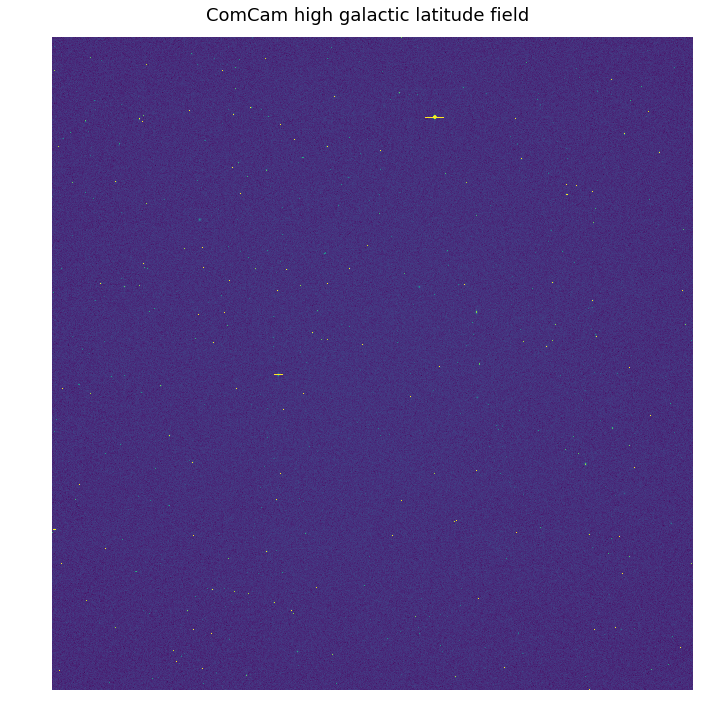

In [46]:
%matplotlib inline

fig,axs = plt.subplots(3,3,figsize=(12,12),frameon=False)
ax = np.ravel(axs)

detector_order =['S02', 'S12', 'S22', 'S01','S11','S21','S00', 'S10','S20']
for i in range(len(ax)):
    detector = detector_order[i]
    ax[i].imshow(np.log10(images[detector].T),vmin = 2.3, vmax=3.5, origin='lower')
    #ax[i].tick_params(axis='x',  which='both', bottom='off',  top='off', labelbottom='off')  
    #ax[i].xaxis.set_visible(False)
    #ax[i].yaxis.set_visible(False)
    ax[i].axis('off')
fig.subplots_adjust(hspace=0,wspace=-0.12)
fig.text(0.32,0.9,'ComCam high galactic latitude field', fontsize=18)
plt.savefig('dr2_gaia_R22_high_full_FOV_focal.png', bbox_inches='tight')

Plot **Baade** : 

In [47]:
# First, read all the image data 
baseDir = '/astro/store/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/'
topDir = 'results_gaia'
resDir = 'dr2_Baade_full_2020_24_wide'
data_dir = os.path.join(baseDir, topDir,resDir)

focalType = 'extra' 

raft = 'R22'
images = {}
for detector in ['S00','S01','S02', 'S10', 'S11', 'S12', 'S20','S21','S22']:
    images[detector] = at.readPostISRImage(data_dir, focalType = focalType,
                                           raft = raft, detector = detector, 
                                          rerun='run2')

data_id is
{'visit': 9006001, 'filter': 'g', 'raftName': 'R22', 'detectorName': 'S00', 'detector': 90}
Reading postISR images from the following repo_dir:
/astro/store/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/dr2_Baade_full_2020_24_wide/input/rerun/run2
Done

data_id is
{'visit': 9006001, 'filter': 'g', 'raftName': 'R22', 'detectorName': 'S01', 'detector': 91}
Reading postISR images from the following repo_dir:
/astro/store/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/dr2_Baade_full_2020_24_wide/input/rerun/run2
Done

data_id is
{'visit': 9006001, 'filter': 'g', 'raftName': 'R22', 'detectorName': 'S02', 'detector': 92}
Reading postISR images from the following repo_dir:
/astro/store/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/dr2_Baade_full_2020_24_wide/input/rerun/run2
Done

data_id is
{'visit': 9006001, 'filter': 'g', 'raftName': 'R22', 'detectorName':

/astro/store/epyc/projects/lsst_comm/stack_w_2020_24/conda/miniconda3-4.7.12/envs/lsst-scipipe-1a1d771/lib/python3.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in log10


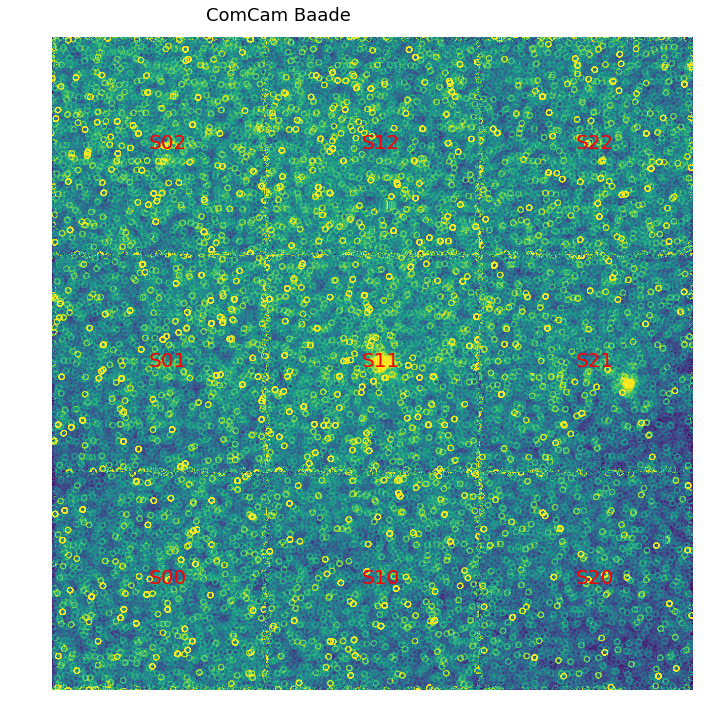

In [49]:
%matplotlib inline

#f = images['S00'].shape[1]/images['S00'].shape[0]  # this is x/y ratio
# it's f = 4072/4000 
# thus x = f*y
side=12


title ='Baade'
#fig,axs = plt.subplots(3,3,figsize=(f*side,side),frameon=False)
fig,axs = plt.subplots(3,3,figsize=(12,12),frameon=False)
ax = np.ravel(axs)
detectors = list(images.keys())
# do the correct detector order left-right,  top-to-bottom: 
# that way the output has 
# the correct orientation:
# ra (X) increasing left-right,
# dec (Y) increasing bottom-up 
detector_order =['S02', 'S12', 'S22', 'S01','S11','S21','S00', 'S10','S20']
for i in range(len(ax)):
    detector = detector_order[i]
    ax[i].imshow(np.log10(images[detector].T),vmin = 2.55, vmax=3.65, 
                 origin='lower')
    #ax[i].tick_params(axis='x',  which='both', bottom='off',  top='off', labelbottom='off')  
    #ax[i].xaxis.set_visible(False)
    #ax[i].yaxis.set_visible(False)
    ax[i].axis('off')
    ax[i].text(1800,2000,detector,fontsize=20,color='red')
fig.subplots_adjust(hspace=0,wspace=-0.12)
fig.text(0.32,0.9,'ComCam %s'%title, fontsize=18)
plt.savefig('dr2_gaia_ComCam_Baade_full_FOV_extra.png', bbox_inches='tight')

/astro/store/epyc/projects/lsst_comm/stack_w_2020_24/conda/miniconda3-4.7.12/envs/lsst-scipipe-1a1d771/lib/python3.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10


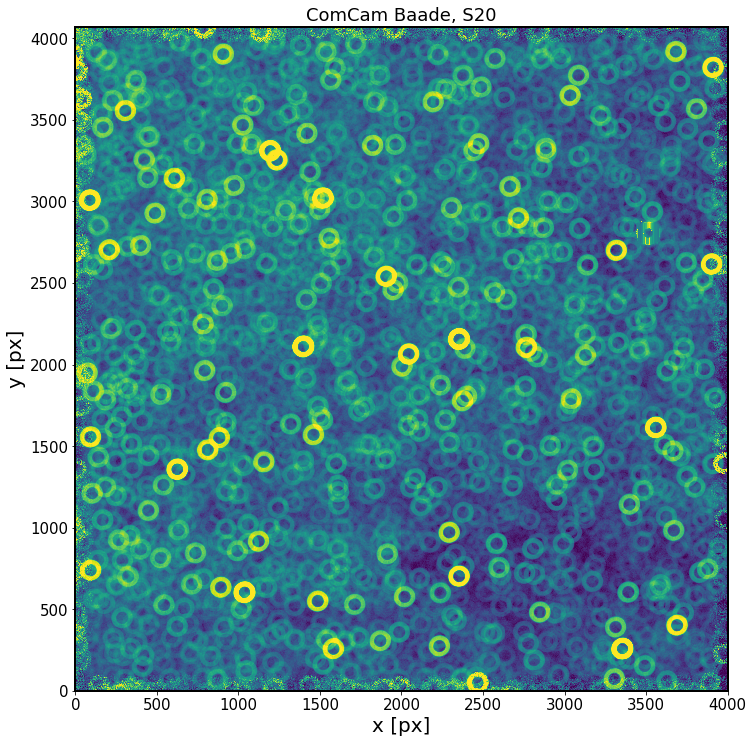

In [88]:
# plot just one detector .. 
side=12
fig,ax = plt.subplots(1,1,figsize=(side,f*side),frameon=False)
detector = 'S20'
ax.imshow(np.log10(images[detector].T),vmin = 2.55, vmax=3.65, 
             origin='lower')
#ax[i].tick_params(axis='x',  which='both', bottom='off',  top='off', labelbottom='off')  
#ax[i].xaxis.set_visible(False)
#ax[i].yaxis.set_visible(False)
#ax.axis('off')
ax.set_xlabel('x [px]')
ax.set_ylabel('y [px]')
ax.set_title('ComCam Baade, %s'%detector, fontsize=18)
plt.savefig('dr2_gaia_ComCam_Baade_%s_extra.png'%detector, bbox_inches='tight')

Read-in the input catalog to show where are the brightest stars here : 

In [50]:
dir_in = '/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/'
file_path = os.path.join(dir_in, 'starCatGAIA_Baade_full.txt')
cat = Table.read(file_path, format='ascii')

(array([1.00000e+00, 1.40000e+01, 5.80000e+01, 3.78000e+02, 2.30400e+03,
        1.22230e+04, 5.32650e+04, 9.92350e+04, 2.82168e+05, 9.06160e+04]),
 array([ 7.054563 ,  8.4197761,  9.7849892, 11.1502023, 12.5154154,
        13.8806285, 15.2458416, 16.6110547, 17.9762678, 19.3414809,
        20.706694 ]),
 <a list of 10 Patch objects>)

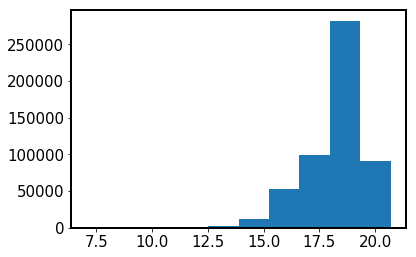

In [51]:
%matplotlib inline
plt.hist(cat['Mag'])

In [73]:
mag.round(2)

7.05

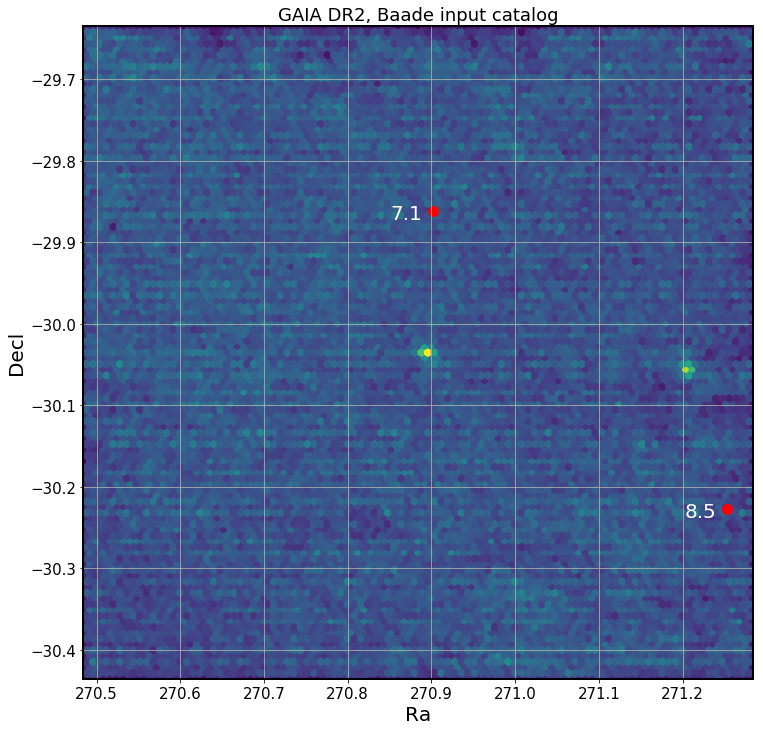

In [79]:
fig,ax = plt.subplots(1,1,figsize=(12,12))
ax.hexbin(cat['Ra'], cat['Decl'], )
ax.grid()
ax.set_xlabel('Ra')
ax.set_ylabel('Decl')
ax.set_title('GAIA DR2, Baade input catalog')
m = cat['Mag']<9
ax.scatter(cat['Ra'][m], cat['Decl'][m], s=100,c='red')
for i in range(len(cat['Mag'][m])):
    ra,dec = cat['Ra'][m][i], cat['Decl'][m][i]
    mag = cat['Mag'][m][i]
    ax.text(ra-0.05,dec-0.01,str(mag.round(1)),fontsize=20,color='white')
plt.savefig('dr2_gaia_ComCam_Baade_input_catalog.png', bbox_inches='tight')

Also, show the full comcam raft for Pleiades : 

In [53]:
resDir = 'dr2_Pleiades_full_2020_24_wide'
data_dir = os.path.join(baseDir, topDir,resDir)

focalType = 'focal' # extra

raft = 'R22'
images = {}
for detector in ['S00','S01','S02', 'S10', 'S11', 'S12', 'S20','S21','S22']:
    images[detector] = at.readPostISRImage(data_dir, focalType = focalType,
                                           raft = raft, detector = detector,
                                           rerun='run2')




data_id is
{'visit': 9006000, 'filter': 'g', 'raftName': 'R22', 'detectorName': 'S00', 'detector': 90}
Reading postISR images from the following repo_dir:
/astro/store/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/dr2_Pleiades_full_2020_24_wide/input/rerun/run2
Done

data_id is
{'visit': 9006000, 'filter': 'g', 'raftName': 'R22', 'detectorName': 'S01', 'detector': 91}
Reading postISR images from the following repo_dir:
/astro/store/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/dr2_Pleiades_full_2020_24_wide/input/rerun/run2
Done

data_id is
{'visit': 9006000, 'filter': 'g', 'raftName': 'R22', 'detectorName': 'S02', 'detector': 92}
Reading postISR images from the following repo_dir:
/astro/store/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/dr2_Pleiades_full_2020_24_wide/input/rerun/run2
Done

data_id is
{'visit': 9006000, 'filter': 'g', 'raftName': 'R22', 'detec

The input catalog was part of the Pleiades cluster : <img src="M45map.jpg">

To directly compare to that need to flip-x :

/astro/store/epyc/projects/lsst_comm/stack_w_2020_24/conda/miniconda3-4.7.12/envs/lsst-scipipe-1a1d771/lib/python3.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in log10


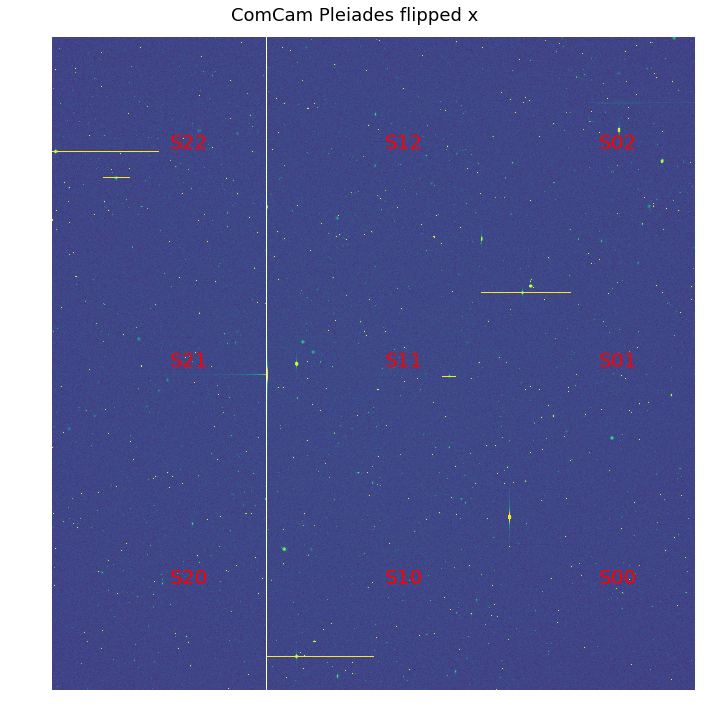

In [55]:
%matplotlib inline

f = images['S00'].shape[1]/images['S00'].shape[0]  # this is x/y ratio
# it's f = 4072/4000 
# thus x = f*y
side=12


title ='Pleiades'
fig,axs = plt.subplots(3,3,figsize=(f*side,side),frameon=False)
ax = np.ravel(axs)
detectors = list(images.keys())
# do the correct detector order left-right,  top-to-bottom: 
# that way the output has 
# the correct orientation:
# ra (X) increasing left-right,
# dec (Y) increasing bottom-up 
right_detector_order =['S02', 'S12', 'S22', 
                       'S01', 'S11', 'S21',
                       'S00', 'S10', 'S20']
flip_detector_order = ['S22', 'S12', 'S02', 
                       'S21', 'S11', 'S01',
                       'S20', 'S10', 'S00']

detector_order =  flip_detector_order.copy()
for i in range(len(ax)):
    detector = detector_order[i]
    ax[i].imshow(np.log10(images[detector].T),vmin = 2.3, vmax=3.5, 
                 origin='lower')
    #ax[i].tick_params(axis='x',  which='both', bottom='off',  top='off', labelbottom='off')  
    #ax[i].xaxis.set_visible(False)
    #ax[i].yaxis.set_visible(False)
    ax[i].axis('off')
    ax[i].text(1800,2000,detector,fontsize=20,color='red')
    ax[i].invert_xaxis()
fig.subplots_adjust(hspace=0,wspace=-0.15)
fig.text(0.35,0.9,'ComCam %s flipped x '%title, fontsize=18)
plt.savefig('dr2_gaia_ComCam_Pleiades_full_FOV_focal_invert_x.png', bbox_inches='tight')

Also show the extrafocal image:

In [57]:
focalType = 'extra'

raft = 'R22'
images = {}
for detector in ['S00','S01','S02', 'S10', 'S11', 'S12', 'S20','S21','S22']:
    images[detector] = at.readPostISRImage(data_dir, focalType = focalType,
                                           raft = raft, detector = detector,
                                          rerun='run2')




data_id is
{'visit': 9006001, 'filter': 'g', 'raftName': 'R22', 'detectorName': 'S00', 'detector': 90}
Reading postISR images from the following repo_dir:
/astro/store/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/dr2_Pleiades_full_2020_24_wide/input/rerun/run2
Done

data_id is
{'visit': 9006001, 'filter': 'g', 'raftName': 'R22', 'detectorName': 'S01', 'detector': 91}
Reading postISR images from the following repo_dir:
/astro/store/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/dr2_Pleiades_full_2020_24_wide/input/rerun/run2
Done

data_id is
{'visit': 9006001, 'filter': 'g', 'raftName': 'R22', 'detectorName': 'S02', 'detector': 92}
Reading postISR images from the following repo_dir:
/astro/store/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/dr2_Pleiades_full_2020_24_wide/input/rerun/run2
Done

data_id is
{'visit': 9006001, 'filter': 'g', 'raftName': 'R22', 'detec

In [ ]:
%matplotlib inline

f = images['S00'].shape[1]/images['S00'].shape[0]  # this is x/y ratio
# it's f = 4072/4000 
# thus x = f*y
side=12


title ='Pleiades'
fig,axs = plt.subplots(3,3,figsize=(f*side,side),frameon=False)
ax = np.ravel(axs)
detectors = list(images.keys())
# do the correct detector order left-right,  top-to-bottom: 
# that way the output has 
# the correct orientation:
# ra (X) increasing left-right,
# dec (Y) increasing bottom-up 
detector_order = flip_detector_order.copy()

for i in range(len(ax)):
    detector = detector_order[i]
    ax[i].imshow(np.log10(images[detector].T),vmin = 2.3, vmax=3.5, 
                 origin='lower')
    #ax[i].tick_params(axis='x',  which='both', bottom='off',  top='off', labelbottom='off')  
    #ax[i].xaxis.set_visible(False)
    #ax[i].yaxis.set_visible(False)
    ax[i].axis('off')
    ax[i].text(1800,2000,detector,fontsize=20,color='red')
    ax[i].invert_xaxis()
fig.subplots_adjust(hspace=0,wspace=-0.15)
fig.text(0.42,0.9,'ComCam %s flipped x '%title, fontsize=18)
plt.savefig('dr2_gaia_ComCam_Pleiades_full_FOV_extra_invert_x.png', bbox_inches='tight')

Also, plot the input catalog:

In [ ]:
from astropy.table import Table
dir_in = '/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/'
file_path = os.path.join(dir_in, 'starCatGAIA_Pleiades_full.txt')
cat = Table.read(file_path, format='ascii')

fig,ax = plt.subplots(1,1,figsize=(13,13))
m = cat['Mag']<9
ax.scatter(cat['Ra'][~m], cat['Decl'][~m], c='none', edgecolor='orange')
ax.grid()
ax.set_xlabel('Ra')
ax.set_ylabel('Decl')

ax.set_title('GAIA DR2, Pleiades input catalog')

ax.scatter(cat['Ra'][m], cat['Decl'][m], s=150,c='none', edgecolor='red',lw=2)
for i in range(len(cat['Mag'][m])):
    ra,dec = cat['Ra'][m][i], cat['Decl'][m][i]
    mag = cat['Mag'][m][i]
    ax.text(ra+0.05,dec-0.01,str(mag.round(1)),fontsize=20,color='black')
ax.invert_xaxis()
plt.savefig('dr2_gaia_ComCam_Pleiades_input_catalog.png', bbox_inches='tight',)#
          # transparent=True)